In [1]:
# numpy와 함께 많이 사용되는 라이브러리로 pandas가 있다.
# pandas의 핵심 데이터 구조로는 datafreme이 있으며 numpy와 같이 다차원 배열을 다룰 수 있지만 휠씬 더 많은 기능을 제공한다고 한다.
# pandas의 dataframe은 쉽게 numpy list로 변환할 수 있다.

In [2]:
# pandas에서 주로 사용하는 파일로는 csv 파일이 있으며 pandas의 read_csv()를 사용하여 해당 위치의 csv 파일을 읽어 데이터 프레임으로 저장한 뒤 필요에 따라
# to_numpy()함수를 사용하여 numpy list 로 변환한디.
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [3]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42
)

In [5]:
# sklearn에서는 다양한 전처리 클래스를 제공하며 이를 변환기(transformer)라 칭하며, 모든 변환기 클래스에서 fit(), transform() 함수를 제공한다.
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [6]:
# 아래와 같이 기존의 특성들을 서로 곱하거나 제곱하여 특성의 개수를 늘리는 것을 특성 공학(feature engineering)이라고 한다.
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input) # 어떤 형식으로 변환할지를 특성의 개수에 따라 조합을 구성
train_poly = poly.transform(train_input) # 변환
print(train_poly.shape)

(42, 9)


In [7]:
# PolynomialFeatures 클래스는 각각의 특성이 어떻게 만들어졌는지 알려주는 함수 get_feature_names_out()를 제공한다.
# 기존에 사용한 N개의 특성을 예로 들어 x0 ~ xN은 각각의 특성을 뜻하며 x0^2는 첫번째 특성의 제곱을 뜻하고 x0 x1은 첫번째 특성과 두번째 특성의 곱을 뜻한다.
print(poly.get_feature_names_out())

['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']


In [8]:
test_poly = poly.transform(test_input)

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982125
0.9714559911594111


In [12]:
poly = PolynomialFeatures(degree=5, include_bias=False) # degree를 사용하여 고차항 지정 가능
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [13]:
# 특성의 개수를 과도하게 늘린 결과 훈련 세트에 과대적합되는 상황
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999996433
-144.40579436844948


In [14]:
# 규제 - 머신러닝 모델이 훈련 세트에 과도하게 학습되지 못하도록 하는 것으로 선형 회귀의 경우 계수(기울기)의 크기를 줄이는 방식으로 규제를 한다.
# 규제를 가하기 전에 특성의 스케일을 맞추지 않으면 각각의 규제에 적용할 계수의 값이 다르게 되어 공정하게 규제를 가할 수 없으므로 각 특성들의 스케일을 맞춰주는 StrandardScaler 변환기를 사용한다.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [15]:
print(train_scaled)
print(test_scaled)

[[-1.01339619 -1.01007487 -1.01952321 ... -0.76449499 -0.75967179
  -0.75143746]
 [-0.73842893 -0.75254307 -0.74466913 ... -0.73198449 -0.72731765
  -0.71950111]
 [-1.11650891 -0.98919391 -0.97371419 ... -0.76114089 -0.75592147
  -0.74734146]
 ...
 [-0.32597805 -0.51589222 -0.33238802 ... -0.65673421 -0.64237495
  -0.62509499]
 [ 1.55296488  1.65572732  1.17358328 ...  1.45958191  1.19906225
   0.95977016]
 [ 0.6936922   0.7717668   0.8987292  ...  0.3701756   0.40321427
   0.43089551]]
[[-2.29657672 -2.0645632  -1.95288184 -1.55255604 -1.46585499 -1.45227925
  -1.38306012 -1.36853915 -1.3414385  -1.16487216 -1.12766176 -1.12993021
  -1.09096504 -1.0919529  -1.08681842 -1.05473034 -1.05422049 -1.04733556
  -1.03445922 -0.95097661 -0.93581382 -0.94095847 -0.92003743 -0.92481854
  -0.9257405  -0.90344054 -0.9076728  -0.90768173 -0.90365223 -0.88585964
  -0.88933355 -0.8882214  -0.88265495 -0.87279092 -0.82345261 -0.81922614
  -0.82441462 -0.81401521 -0.81951597 -0.82223805 -0.80760074 -0

In [16]:
# 선형 회귀 모델에 규제를 추가한 모델을 릿지(ridge), 라쏘(lasso)라 부르며 릿지는 계수를 제곱한 값을 기준으로, 라쏘는 계수의 절대값을 기준으로 규제를 적용한다.
# 릿지와 라쏘 모두 sklearn.linear_model 패키지에 포함되어 있다.

In [20]:
# 릿지
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615387


In [21]:
# 릿지와 라쏘에서 규제의 강도를 조절할 때 쓰는 값을 alpha라고 하며 모델 객체를 만들 때 매개변수로 지정한다.
# alpha 값이 크면 규제의 강도가 강해져 계수 값을 더 줄이고 과소적합 되도록 유도하며 반대의 경우 규제가 약해져 기존의 선형회귀와 비슷해지며, 과대적합될 가능성이 커진다.
# alpha와 같이 머신러닝 모델이 학습할 수 없고 개발자가 지정해줘야하는 값들을 하이퍼파라미터(hyperparameter)라고 부른다.

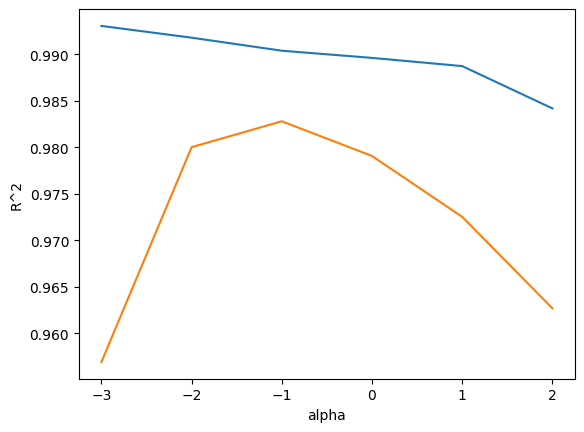

In [22]:
# 최적의 alpha값을 찾기 위해서는 R2 값 그래프를 그려보는 것이 가장 좋으며 훈련 세트와 테스트 세트가 가장 가까운 지점이 최적의 alpha값이 된다.
import matplotlib.pyplot as plt
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

# alpha값의 0.001 ~ 1사이의 값을 그대로 나타낼 경우 그래프의 폭이 너무 촘촘해지므로 log를 사용하여 지수로 표현
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()